# Problem Set 2

## Short Answer and “True or False” Conceptual questions

**A1.** The answers to these questions should be answerable without
referring to external materials. Briefly justify your answers with a few
words.

1.  In your own words, describe what bias and variance are? What is
    bias-variance tradeoff?

2.  What typically happens to bias and variance when the model
    complexity increases/decreases?

3.  True or False: A learning algorithm will always generalize better if
    we use fewer features to represent our data.

4.  True or False: Hyperparameters should be tuned on the test set.
    Explain your choice and detail a procedure for hyperparameter
    tuning.

5.  True or False: The training error of a function on the training set
    provides an overestimate of the true error of that function.

## Maximum Likelihood Estimation (MLE)

**A2.** You’re the Reign FC manager, and the team is five games into its
2021 season. The number of goals scored by the team in each game so far
are given below:

$[2, 4, 6, 0, 1]$.

Let’s call these scores $x_1, \dots, x_5$. Based on your (assumed iid)
data, you’d like to build a model to understand how many goals the Reign
are likely to score in their next game. You decide to model the number
of goals scored per game using a Poisson distribution. Recall that the
Poisson distribution with parameter $\lambda$ assigns every non-negative
integer $x = 0, 1, 2, \dots$ a probability given by

$$\text{Poi}(x|\lambda) = e^{-\lambda}\frac{\lambda^x}{x!}.$$

1.  Derive an expression for the maximum-likelihood estimate of the
    parameter $\lambda$ governing the Poisson distribution in terms of
    goal counts for the first $n$ games: $x_1, \dots, x_n$. (Hint:
    remember that the log of the likelihood has the same maximizer as
    the likelihood function itself.)

2.  Give a numerical estimate of $\lambda$ after the first five games.
    Given this $\lambda$, what is the probability that the Reign score 6
    goals in their next game?

3.  Suppose the Reign score 8 goals in their 6th game. Give an updated
    numerical estimate of $\lambda$ after six games and compute the
    probability that the Reign score 6 goals in their 7th game.

## Polynomial Regression

**Relevant Files¹** \* `polyreg.py` \* `linreg_closedform.py` \*
`plot_polyreg_univariate.py` \* `plot_polyreg_learningCurve.py`

**A3.** Recall that polynomial regression learns a function
$h_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2 + \dots + \theta_dx^d$,
where $d$ represents the polynomial’s highest degree. We can
equivalently write this in the form of a linear model with $d$ features
$$h_\theta(x) = \theta_0 + \theta_1\phi_1(x) + \theta_2\phi_2(x) + \dots + \theta_d\phi_d(x) \quad (1)$$
using the basis expansion that $\phi_j(x) = x^j$. Notice that, with this
basis expansion, we obtain a linear model where the features are various
powers of the single univariate $x$. We’re still solving a linear
regression problem, but are fitting a polynomial function of the input.

Implement regularized polynomial regression in `polyreg.py`. You may
implement it however you like, using gradient descent or a closed-form
solution. However, we recommend the closed-form solution since the data
sets are small; for this reason, we’ve included an example closed-form
implementation of linear regression in `linreg_closedform.py` (you are
welcome to build upon this implementation, but make CERTAIN you
understand it, since you’ll need to change several lines of it). You are
also welcome to build upon your implementation from the previous
assignment, but you must follow the API below. Note that all matrices
are actually 2D numpy arrays in the implementation.

- `__init__(degree=1, regLambda=1E-8)`: constructor with arguments of
  $d$ and $\lambda$
- `fit(X,Y)`: method to train the polynomial regression model
- `predict(X)`: method to use the trained polynomial regression model
  for prediction
- `polyfeatures(X, degree)`: expands the given $n \times 1$ matrix $X$
  into an $n \times d$ matrix of polynomial features of degree $d$. Note
  that the returned matrix will not include the zero-th power.

Note that the `polyfeatures(X, degree)` function maps the original
univariate data into its higher order powers. Specifically, $X$ will be
an $n \times 1$ matrix ($X \in \mathbb{R}^{n \times 1}$) and this
function will return the polynomial expansion of this data, a
$n \times d$ matrix. Note that this function will **not** add in the
zero-th order feature (i.e., $x_0 = 1$). You should add the $x_0$
feature separately, outside of this function, before training the model.

By not including the $x_0$ column in the matrix `polyfeatures()`, this
allows the `polyfeatures` function to be more general, so it could be
applied to multi-variate data as well. (If it did add the $x_0$ feature,
we’d end up with multiple columns of 1’s for multivariate data.)

Also, notice that the resulting features will be badly scaled if we use
them in raw form. For example, with a polynomial of degree $d = 8$ and
$x = 20$, the basis expansion yields $x^1 = 20$ while
$x^8 = 2.56 \times 10^{10}$ – an absolutely huge difference in range.
Consequently, we will need to standardize the data before solving linear
regression. Standardize the data in `fit()` after you perform the
polynomial feature expansion. You’ll need to apply the same
standardization transformation in `predict()` before you apply it to new
data.

<figure>
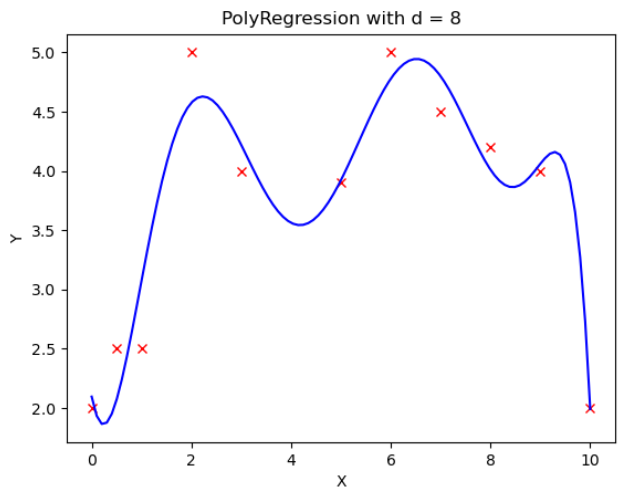
<figcaption aria-hidden="true">Polynomial Regression</figcaption>
</figure>

**Figure 1: Fit of polynomial regression with $\lambda = 0$ and
$d = 8$** The figure displays a 2D plot titled “PolyRegression with d =
8”. The x-axis ranges from 0 to 10, and the y-axis ranges from 2.0 to
5.0. Several red ‘x’ marks are scattered across the plot, representing
data points. A blue curve, representing the fitted polynomial regression
model, passes through or near these data points. The curve shows
significant oscillations, indicating a high degree of fit to the
training data, which might suggest overfitting given the context of
$\lambda = 0$ (no regularization) and $d = 8$ (high polynomial degree).

Run `plot_polyreg_univariate.py` to test your implementation, which will
plot the learned function. In this case, the script fits a polynomial of
degree $d = 8$ with no regularization $\lambda = 0$. From the plot, we
see that the function fits the data well, but will not generalize well
to new data points. Try increasing the amount of regularization, and in
1-2 sentences, describe the resulting effect on the function (you may
also provide an additional plot to support your analysis).

------------------------------------------------------------------------

¹Bold text indicates files or functions that you will need to complete;
you should not need to modify any of the other files.

## Learning Curves and Bias-Variance Tradeoff

**A4.** In this problem we will examine the bias-variance tradeoff
through learning curves. Learning curves provide a valuable mechanism
for evaluating the bias-variance tradeoff. Implement the
`learningCurve()` function in `polyreg.py` to compute the learning
curves for a given training/test set. The
`learningCurve(Xtrain, ytrain, Xtest, ytest, degree, regLambda)`
function should take in the training data (`Xtrain`, `ytrain`), the
testing data (`Xtest`, `ytest`), and values for the polynomial degree
$d$ and regularization parameter $\lambda$. The function should return
two arrays, `errorTrain` (the array of training errors) and `errorTest`
(the array of testing errors). The $i^{th}$ index (start from 0) of each
array should return the training error (or testing error) for learning
with $i + 1$ training instances. Note that the $0^{th}$ index actually
won’t matter, since we typically start displaying the learning curves
with two or more instances.

When computing the learning curves, you should learn on `Xtrain[0:i]`
for $i = 1, \dots, \text{numInstances(Xtrain)}$, each time computing the
testing error over the **entire** test set. There is no need to shuffle
the training data, or to average the error over multiple trials – just
produce the learning curves for the given training/testing sets with the
instances in their given order. Recall that the error for regression
problems is given by

$$\frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x_i) - y_i)^2. \quad (2)$$

Once the function is written to compute the learning curves, run the
`plot_polyreg_learningCurve.py` script to plot the learning curves for
various values of $\lambda$ and $d$. You should see plots similar to the
following: Notice the following:

- The y-axis is using a log-scale and the ranges of the y-scale are all
  different for the plots. The dashed black line indicates the $y = 1$
  line as a point of reference between the plots.
- The plot of the unregularized model with $d = 1$ shows poor training
  error, indicating a high bias (i.e., it is a standard univariate
  linear regression fit).
- The plot of the (almost) unregularized model ($\lambda = 10^{-6}$)
  with $d = 8$ shows that the training error is low, but that the
  testing error is high. There is a huge gap between the training and
  testing errors caused by the model overfitting the training data,
  indicating a high variance problem.
- As the regularization parameter increases (e.g., $\lambda = 1$) with
  $d = 8$, we see that the gap between the training and testing error
  narrows, with both the training and testing errors converging to a low
  value. We can see that the model fits the data well and generalizes
  well, and therefore does not have either a high bias or a high
  variance problem. Effectively, it has a good tradeoff between bias and
  variance.
- Once the regularization parameter is too high ($\lambda = 100$), we
  see that the training and testing errors are once again high,
  indicating a poor fit. Effectively, there is too much regularization,
  resulting in high bias.

Create plots for the same values of $d$ and $\lambda$ shown here. Make
absolutely certain that you understand these observations, and how they
relate to the learning curve plots. In practice, we can choose the value
for $\lambda$ via cross-validation to achieve the best bias-variance
tradeoff.

Plots:

<figure>
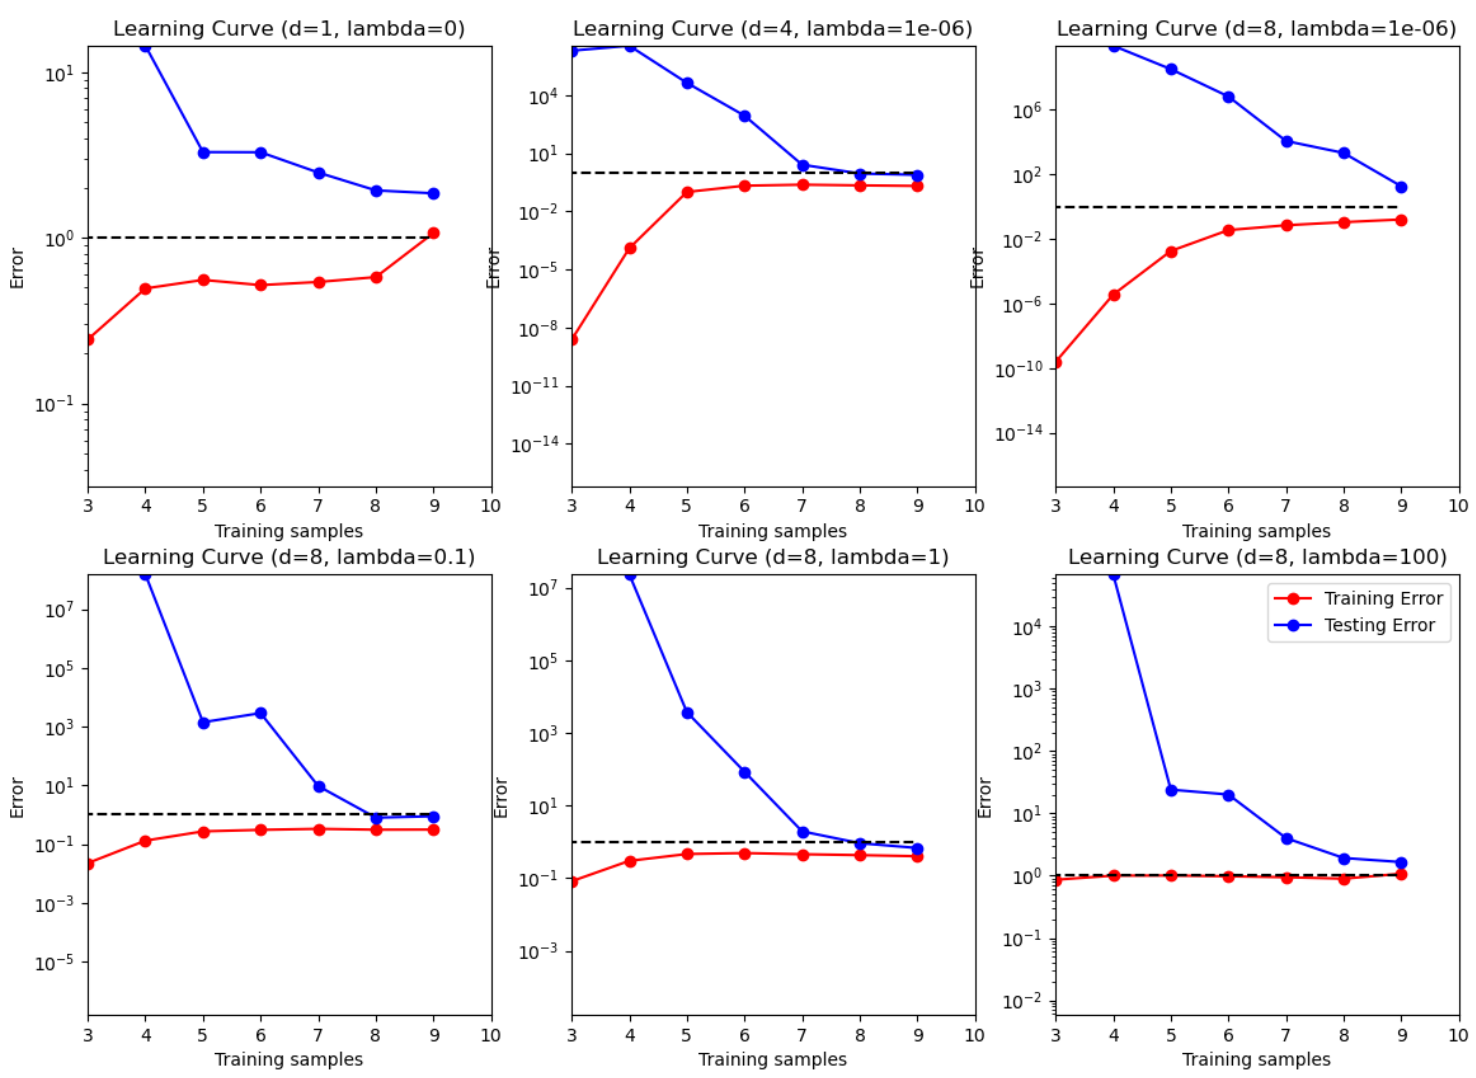
<figcaption aria-hidden="true">Sample plots</figcaption>
</figure>

## Ridge Regression on MNIST

**A5.** In this problem we will implement a regularized least squares
classifier for the MNIST data set. The task is to classify handwritten
images of numbers between 0 to 9.

You are **NOT** allowed to use any of the pre-built classifiers in
`sklearn`. Feel free to use any method from `numpy` or `scipy`.
**Remember**: if you are inverting a matrix in your code, you are
probably doing something wrong (Hint: look at `scipy.linalg.solve`).

Each example has features $x_i \in \mathbb{R}^d$ (with
$d = 28*28 = 784$) and label $z_j \in \{0,...,9\}$. You can visualize a
single example $x_i$ with `imshow` after reshaping it to its original
$28 \times 28$ image shape (and noting that the label $z_j$ is
accurate). We wish to learn a predictor $\hat{f}$ that takes as input a
vector in $\mathbb{R}^d$ and outputs an index in $\{0,...,9\}$. We
define our training and testing classification error on a predictor $f$
as

$$\hat{\epsilon}_{\text{train}}(f) = \frac{1}{N_{\text{train}}} \sum_{(x,z) \in \text{Training Set}} \mathbf{1}\{f(x) \neq z\}$$

$$\hat{\epsilon}_{\text{test}}(f) = \frac{1}{N_{\text{test}}} \sum_{(x,z) \in \text{Test Set}} \mathbf{1}\{f(x) \neq z\}$$

We will use one-hot encoding of the labels: for each observation
$(x, z)$, the original label $z \in \{0,...,9\}$ is mapped to the
standard basis vector $e_{z+1}$ where $e_i$ is a vector of size $k$
containing all zeros except for a 1 in the $i^{\text{th}}$ position
(positions in these vectors are indexed starting at one, hence the
$z + 1$ offset for the digit labels). We adopt the notation where we
have $n$ data points in our training objective with features
$x_i \in \mathbb{R}^d$ and label one-hot encoded as $y_i \in \{0,1\}^k$.
Here, $k = 10$ since there are 10 digits.

**a.** In this problem, we will choose a linear classifier to minimize
the regularized least squares objective:
$$\hat{W} = \operatorname{argmin}_{W \in \mathbb{R}^{d \times k}} \sum_{i=1}^{n} \|W^T x_i - y_i\|^2 + \lambda \|W\|_F^2$$
Note that $\|W\|_F$ corresponds to the Frobenius norm of $W$, i.e.,
$\|W\|_F^2 = \sum_{i=1}^{d} \sum_{j=1}^{k} W_{i,j}^2$. To classify a
point $x_i$, we will use the rule
$\operatorname{argmax}_{j=0,...,9} e_{j+1}^T \hat{W}^T x_i$. Note that
if $W = [w_1 \quad ... \quad w_k]$ then
$$\sum_{i=1}^{n} \|W^T x_i - y_i\|^2 + \lambda \|W\|_F^2 = \sum_{j=1}^{k} \left[ \sum_{i=1}^{n} (e_j^T W^T x_i - e_j^T y_i)^2 + \lambda \|W e_j\|^2 \right]$$
$$= \sum_{j=1}^{k} \left[ \sum_{i=1}^{n} (w_j^T x_i - e_j^T y_i)^2 + \lambda \|w_j\|^2 \right]$$
$$= \sum_{j=1}^{k} \left[ \|X w_j - Y e_j\|^2 + \lambda \|w_j\|^2 \right]$$
where $X = [x_1 \quad ... \quad x_n]^T \in \mathbb{R}^{n \times d}$ and
$Y = [y_1 \quad ... \quad y_n]^T \in \mathbb{R}^{n \times k}$. Show that
$$\hat{W} = (X^T X + \lambda I)^{-1} X^T Y$$

**b.** \* Implement a function `train` that takes as input
$X \in \mathbb{R}^{n \times d}$, $Y \in \{0,1\}^{n \times k}$,
$\lambda > 0$ and returns $\hat{W} \in \mathbb{R}^{d \times k}$. \*
Implement a function `one_hot` that takes as input
$Y \in \{0,..., k-1\}^n$, and returns $Y \in \{0,1\}^{n \times k}$. \*
Implement a function `predict` that takes as input
$\hat{W} \in \mathbb{R}^{d \times k}$, $X' \in \mathbb{R}^{m \times d}$
and returns an $m$-length vector with the $i$th entry equal to
$\operatorname{argmax}_{j=0,...,9} e_j^T \hat{W}^T x_i'$ where
$x_i' \in \mathbb{R}^d$ is a column vector representing the $i$th
example from $X'$. \* Using the functions you coded above, train a model
to estimate $\hat{W}$ on the MNIST training data with
$\lambda = 10^{-4}$, and make label predictions on the test data. This
behavior is implemented in main function provided in zip file. **What is
the training and testing error?** Note that they should both be about
15%.